In [1]:
import numpy as np

In [15]:
def loadDataSet(fileName):
    dataMat =[]
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
#         print('curLine:',curLine)
        fltLine = list(map(float, curLine)) # map all elements to float()s
#         print('fltLine:',fltLine)
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))

def randCent(dataSet, k): # initiaze k clusters
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k,n))) # create centroid mat
    for j in range(n): # create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = np.mat(minJ + rangeJ * np.random.rand(k,1))
    return centroids

In [21]:
dataMat = np.mat(loadDataSet('testSet.txt'))
print('Euclidean distance:',distEclud(dataMat[0], dataMat[1]))
randCent(dataMat, 2)   # 随机初始化 k=2 的中心点

Euclidean distance: 5.184632816681332


matrix([[-3.51137731, -2.93170442],
        [ 0.79471657,  2.05171113]])

## The k-means clustering algorithm

In [61]:
def kMeans(dataSet, k, disMeans=distEclud, createCent=randCent):
    m = np.shape(dataSet)[0]
    # create mat to assign data points to a centroid, also holds SE of each point
    clusterAssment = np.mat(np.zeros((m,2)))
    
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):  # for each data point assign it to the closest centroid
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = disMeans(centroids[j,:], dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i,0] != minIndex:  # 判断输入某个cluster是否改变
                clusterChanged = True
            clusterAssment[i,:] = minIndex, minDist**2  # distance从 sqrt 到 **2
        print('updated centroids:\n',centroids)
        for cent in range(k):  # recalculate centroids
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]] # get all the point in this cluster
#             print('ptsInClust:',ptsInClust)
            centroids[cent,:] = np.mean(ptsInClust, axis=0) # assign centroid to mean
    return centroids, clusterAssment

In [57]:
myCentroids, clusterAssment = kMeans(dataMat, 4)

update centroids:
 [[ 1.97007544 -0.39150035]
 [-0.11120672  3.8821593 ]
 [-1.82693894 -1.05742956]
 [ 0.45703106  1.17550678]]
update centroids:
 [[ 3.02229735 -1.91511343]
 [-0.63717554  3.40279115]
 [-3.19304979 -2.42299775]
 [ 2.19969471  2.581583  ]]
update centroids:
 [[ 2.80293085 -2.7315146 ]
 [-2.45009747  2.89275747]
 [-3.34887714 -2.76960033]
 [ 2.6265299   3.10868015]]
update centroids:
 [[ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]]


In [58]:
myCentroids  # After update

matrix([[ 2.80293085, -2.7315146 ],
        [-2.46154315,  2.78737555],
        [-3.38237045, -2.9473363 ],
        [ 2.6265299 ,  3.10868015]])

In [75]:
import matplotlib.pyplot as plt
def showPlt(dataMat, alg=kMeans, numClust=4):
    myCentroids, clustAssment = alg(dataMat, numClust)
    fig = plt.figure()
    rect = [0.1, 0.1, 0.8, 0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    ax = fig.add_subplot(111)
    for i in range(numClust):  # each point belong to one of cluster
        ptsInCurrCluster = dataMat[np.nonzero(clustAssment[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.savefig("")
    plt.show()

updated centroids:
 [[ 1.35350485 -0.94250585]
 [-3.95645957 -3.75298151]
 [ 2.96099879  3.71434239]
 [ 1.9908206  -3.07229969]]
updated centroids:
 [[-1.58120333  1.8936735 ]
 [-3.6004491  -2.38537448]
 [ 1.27519329  3.17875518]
 [ 2.66260011 -3.01538247]]
updated centroids:
 [[-2.46154315  2.78737555]
 [-3.53973889 -2.89384326]
 [ 2.6265299   3.10868015]
 [ 2.65077367 -2.79019029]]


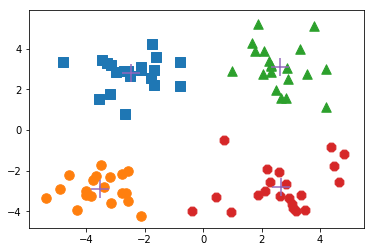

In [91]:
showPlt(dataMat)